<h2>Example 3: Meteorological Input</h2>
In this example, the temperature, RH, and wind shear fields are loaded in through a meteorological input file. The temperature and wind shear in this case are time-dependent, while the RH is not. You can type the command "ncdump example_met_file.nc" to take a look at how the data is organized. This example also demonstrates when a contrail simulation ends due to loss of ice mass. Otherwise, this notebook is almost exactly the same as example 2.

<h4>Meteorological Input Submenu</h4>
Currently, the quantities able to be loaded by meteorological input are temperature, RH, and wind shear. Whether the met. input is used to initialize these fields are controlled by the options "Init temp from met.", "Init RH from met.", and "Init wind shear from met."; similarly, whether time dependent temperature, RH, and wind shear fields are enabled are controlled by those options in the submenu. If a time series met. input is provided but the time series option is turned off, the quantity will remain constant at its value at t=0.





In [1]:
#Import Libs and setup plotting settings
import os.path
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
#Functions that will be used for postprocessing
class apce_data_struct:
    def __init__(self, t, ds_t, icemass, h2omass, numparts):
        self.t = t
        self.ds_t = ds_t
        self.icemass = icemass
        self.h2omass = h2omass
        self.numparts = numparts
    
def read_apcemm_data(directory):
    t_mins = []
    ds_t = []
    ice_mass = []
    total_h2o_mass = []
    num_particles = []

    for file in sorted(os.listdir(directory)):
        if(file.startswith('ts_aerosol') and file.endswith('.nc')):
            file_path = os.path.join(directory,file)
            ds = xr.open_dataset(file_path, engine = "netcdf4", decode_times = False)
            ds_t.append(ds)
            tokens = file_path.split('.')
            mins = int(tokens[-2][-2:])
            hrs = int(tokens[-2][-4:-2])
            t_mins.append(hrs*60 + mins)

            ice_mass.append(ds["Ice Mass"])
            num_particles.append(ds["Number Ice Particles"])
            dx = abs(ds["x"][-1] - ds["x"][0])/len(ds["x"])
            dy = abs(ds["y"][-1] - ds["y"][0])/len(ds["y"])
            
            h2o_mass = np.sum(ds["H2O"]) * 1e6 / 6.022e23 * 0.018 * dx*dy + ds["Ice Mass"]
            total_h2o_mass.append(h2o_mass.values)
    return apce_data_struct(t_mins, ds_t, ice_mass, total_h2o_mass, num_particles)

def removeLow(arr, cutoff = 1e-3):
    func = lambda x: (x > cutoff) * x
    vfunc = np.vectorize(func)
    return vfunc(arr)

In [25]:
apce_data = read_apcemm_data('/home/chinahg/GCresearch/APCEMM/rundirs/SampleRunDir/APCEMM_out/')
t = apce_data.t
ds_t = apce_data.ds_t
ice_mass = apce_data.icemass
total_h2o_mass = apce_data.h2omass
X, Y = np.meshgrid(ds_t[0]['x'], ds_t[0]['y'])

NotADirectoryError: [Errno 20] Not a directory: '/home/chinahg/GCresearch/APCEMM/rundirs/SampleRunDir/APCEMM_out/ts_aerosol_case0_0000.nc'

In [20]:
#Let's take a look at the format of the data


[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 

In [6]:
#You can also look at specific coordinates or variables in the data and see properties such as the units
ds_t[0]["IWC"]

<xarray.DataArray 'IWC' (y: 192, x: 2048)>
[393216 values with dtype=float32]
Coordinates:
  * x        (x) float32 -9.995e+04 -9.985e+04 ... 9.985e+04 9.995e+04
  * y        (y) float32 -1.494e+03 -1.483e+03 -1.472e+03 ... 622.0 633.2 644.4
Attributes:
    units:      kg/m^3
    long_name:  IWC

(366,)


Text(0, 0.5, 'Ice Mass (kg/m)')

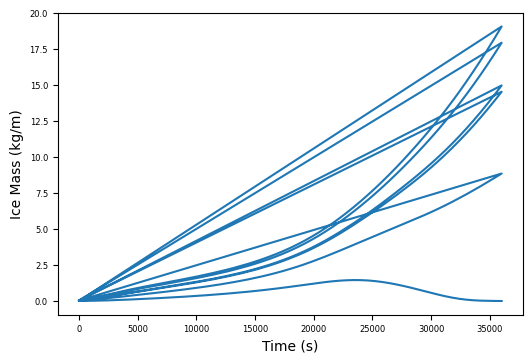

In [24]:
#Example of plotting variables that are a function of time
fig, axes = plt.subplots(dpi=100)
t_s = [i*60 for i in t]
print(np.shape(t_s))
axes.plot(t_s, ice_mass)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Ice Mass (kg/m)")

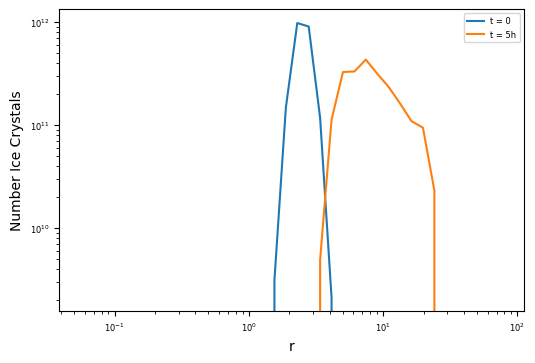

In [8]:
#Visualizing the evolution of the particle radius distribution over time
fig, axes = plt.subplots(dpi=100)
map=plt.plot(ds_t[0]['r'] * 1e6, removeLow(ds_t[0]["Overall size distribution"], cutoff = 1e9), label="t = 0")
map=plt.plot(ds_t[30]['r'] * 1e6, removeLow(ds_t[30]["Overall size distribution"], cutoff = 1e9), label="t = 5h")

axes.set_xlabel('r')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_ylabel('Number Ice Crystals')
plt.legend()
plt.show()

/tmp/ipykernel_3860250/2267369358.py:6: RuntimeWarning: divide by zero encountered in log10
  map1 = ax11.contourf(-X + 2500, Y+1250, np.log10(removeLow(ds_t_2000['Ice aerosol particle number'])), cmap = 'jet')
/tmp/ipykernel_3860250/2267369358.py:14: RuntimeWarning: divide by zero encountered in log10
  map2=ax12.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_4000['Ice aerosol particle number'])), cmap = 'jet')
/tmp/ipykernel_3860250/2267369358.py:23: RuntimeWarning: divide by zero encountered in log10
  map3=ax13.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_17000['Ice aerosol particle number'])), cmap = 'jet')


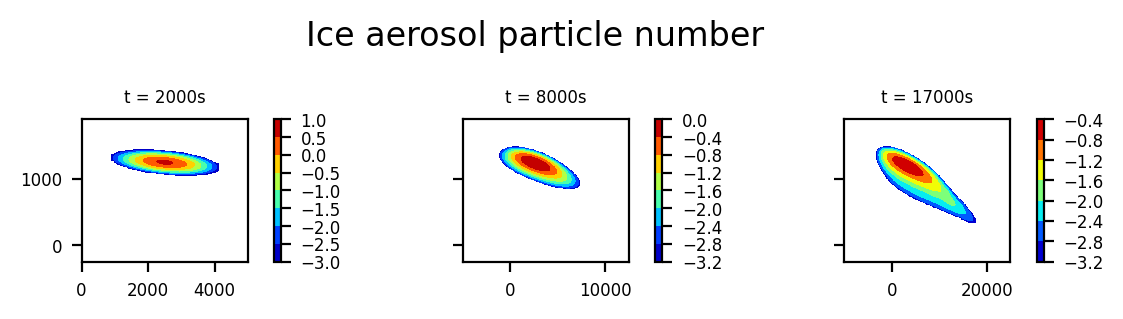

In [9]:
#Ice aerosol number density, note the more irregular shapes of the contrail due to time dependent shear.
fig, ((ax11, ax12, ax13)) = plt.subplots(nrows = 1, ncols = 3, figsize = [6,1.5], dpi=200, sharex=False, sharey=True)
fig.suptitle("Ice aerosol particle number")

ds_t_2000 = ds_t[3] + (1.0/3.0) * (ds_t[4] - ds_t[3])
map1 = ax11.contourf(-X + 2500, Y+1250, np.log10(removeLow(ds_t_2000['Ice aerosol particle number'])), cmap = 'jet')
ax11.set_title('t = 2000s')
ax11.set_xlim(0, 5000)
ax11.set_aspect(2.0)
plt.colorbar(map1, ax = ax11,fraction=0.046, pad=0.1)


ds_t_4000 = ds_t[13] + (1.0/3.0) * (ds_t[14] - ds_t[13])
map2=ax12.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_4000['Ice aerosol particle number'])), cmap = 'jet')
ax12.set_title('t = 8000s')
ax12.set_xlim(-5000, 12500)
ar = 2*17500.0/5000
ax12.set_aspect(ar)
plt.colorbar(map2, ax = ax12,fraction=0.046, pad=0.1)


ds_t_17000 = ds_t[28] + (1.0/3.0) * (ds_t[29] - ds_t[28])
map3=ax13.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_17000['Ice aerosol particle number'])), cmap = 'jet')
ax13.set_title('t = 17000s')
ax13.set_xlim(-10000, 25000)
ar = 2*(35000/5000)
ax13.set_aspect(ar)
plt.colorbar(map3, ax = ax13,fraction=0.046, pad=0.1)


fig.tight_layout(pad=1.0)

plt.show()

/tmp/ipykernel_3860250/2343866795.py:6: RuntimeWarning: divide by zero encountered in log10
  map1 = ax11.contourf(-X + 2500, Y+1250, np.log10(removeLow(ds_t_2000['IWC']*1e6)), cmap = 'jet')
/tmp/ipykernel_3860250/2343866795.py:14: RuntimeWarning: divide by zero encountered in log10
  map2=ax12.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_4000['IWC']*1e6)), cmap = 'jet')
/tmp/ipykernel_3860250/2343866795.py:23: RuntimeWarning: divide by zero encountered in log10
  map3=ax13.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_17000['IWC']*1e6)), cmap = 'jet')


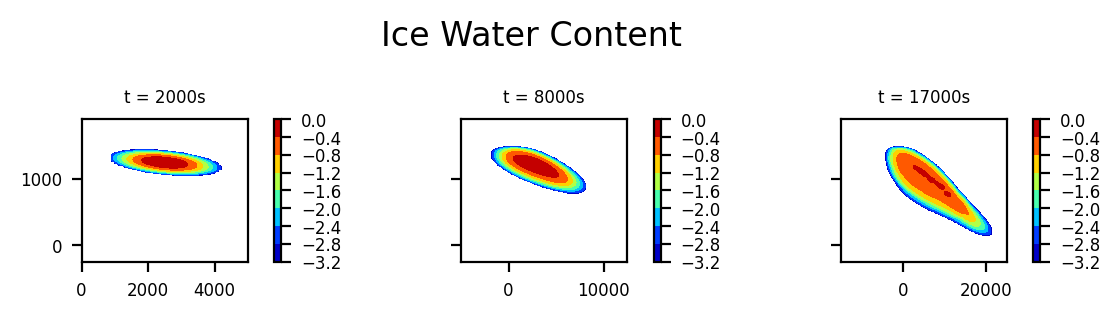

In [10]:
#Ice water content, note how the plot differs from the ice aerosol particle number.
fig, ((ax11, ax12, ax13)) = plt.subplots(nrows = 1, ncols = 3, figsize = [6,1.5], dpi=200, sharex=False, sharey=True)
fig.suptitle("Ice Water Content")

ds_t_2000 = ds_t[3] + (1.0/3.0) * (ds_t[4] - ds_t[3])
map1 = ax11.contourf(-X + 2500, Y+1250, np.log10(removeLow(ds_t_2000['IWC']*1e6)), cmap = 'jet')
ax11.set_title('t = 2000s')
ax11.set_xlim(0, 5000)
ax11.set_aspect(2.0)
plt.colorbar(map1, ax = ax11,fraction=0.046, pad=0.1)


ds_t_4000 = ds_t[13] + (1.0/3.0) * (ds_t[14] - ds_t[13])
map2=ax12.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_4000['IWC']*1e6)), cmap = 'jet')
ax12.set_title('t = 8000s')
ax12.set_xlim(-5000, 12500)
ar = 2*17500.0/5000
ax12.set_aspect(ar)
plt.colorbar(map2, ax = ax12,fraction=0.046, pad=0.1)


ds_t_17000 = ds_t[28] + (1.0/3.0) * (ds_t[29] - ds_t[28])
map3=ax13.contourf(-X+2500, Y+1250, np.log10(removeLow(ds_t_17000['IWC']*1e6)), cmap = 'jet')
ax13.set_title('t = 17000s')
ax13.set_xlim(-15000, 25000)
ar = 2*(40000/5000)
ax13.set_aspect(ar)
plt.colorbar(map3, ax = ax13,fraction=0.046, pad=0.1)


fig.tight_layout(pad=1.0)

plt.show()

/home/chinahg/.local/lib/python3.8/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


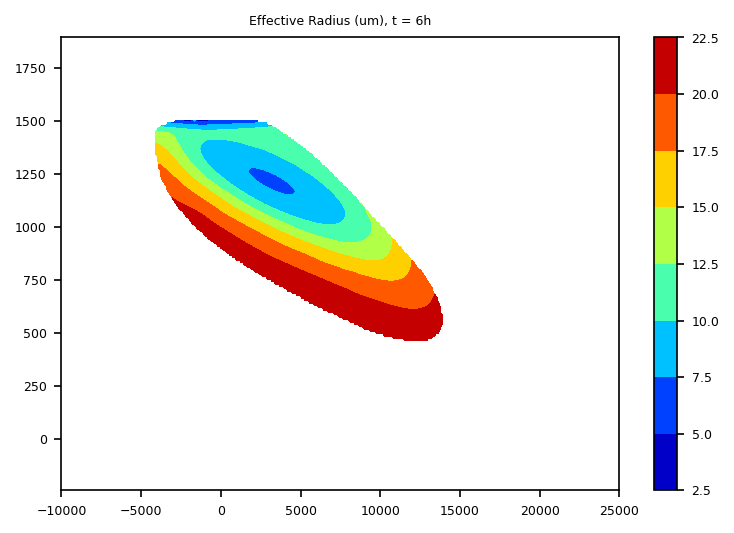

In [11]:
fig,ax = plt.subplots(dpi=150)
to_plot = ds_t[29]['Effective radius']*1e6
ax.set_xlim(-10000,25000)
ax.set_title("Effective Radius (um), t = 6h")
map1 = ax.contourf(-X+2500, Y+1250, np.ma.masked_array(to_plot, mask=np.log10(ds_t[20]['Ice aerosol particle number'])<-6), cmap='jet')
plt.colorbar(map1)
plt.show()

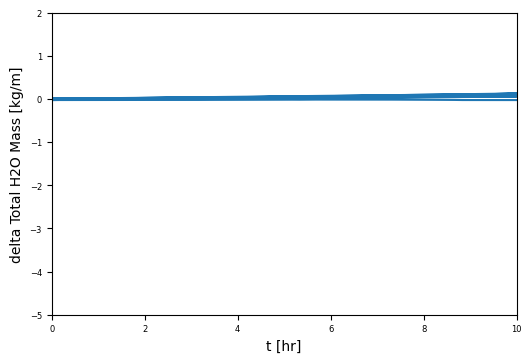

In [12]:
fig, axes = plt.subplots(dpi=100)
axes.plot(np.array(t)/60.0, np.array(total_h2o_mass[:] - total_h2o_mass[0]))
axes.set_xlabel('t [hr]')
axes.set_ylabel('delta Total H2O Mass [kg/m]')
axes.set_xlim(0,10)
axes.set_ylim(-5, 2)
plt.show()